# Python
### 1. FizzBuzz

In [1]:
N = 100
for i in range(1,N+1):
    if (i % 3 == 0) & (i % 5 != 0):
        print 'Fizz', 
    elif (i % 5 == 0) & (i % 3 != 0):
        print 'Buzz',
    elif (i % 3 == 0) & (i % 5 == 0):
        print 'FizzBuzz',
    else:
        print i,
    if (i % 15 == 0):
        print
        

1 2 Fizz 4 Buzz Fizz 7 8 Fizz Buzz 11 Fizz 13 14 FizzBuzz
16 17 Fizz 19 Buzz Fizz 22 23 Fizz Buzz 26 Fizz 28 29 FizzBuzz
31 32 Fizz 34 Buzz Fizz 37 38 Fizz Buzz 41 Fizz 43 44 FizzBuzz
46 47 Fizz 49 Buzz Fizz 52 53 Fizz Buzz 56 Fizz 58 59 FizzBuzz
61 62 Fizz 64 Buzz Fizz 67 68 Fizz Buzz 71 Fizz 73 74 FizzBuzz
76 77 Fizz 79 Buzz Fizz 82 83 Fizz Buzz 86 Fizz 88 89 FizzBuzz
91 92 Fizz 94 Buzz Fizz 97 98 Fizz Buzz


### 2. Сотое число Фибоначчи

In [2]:
a1 = 1
a2 = 0
N = 100
for i in range (1,N+1):
    c = a1 + a2
    a1, a2 = a2, c
print c
    

354224848179261915075


### 3. Сортировка

In [3]:
from random import randint

def QSort(array):
    less = []
    eq = []
    great = []
    if len(array)>1:
        pivot = array[0]
        less = QSort([x for x in array if x < pivot])
        great = QSort([x for x in array if x > pivot])
        eq = ([x for x in array if x == pivot])
        return less + eq + great      
    else:
        return array

N = 10
test_array = []

for i in range(N):
    test_array.append(randint(1, 10 * N))
    
print test_array
print QSort(test_array)

[13, 37, 80, 41, 7, 99, 3, 43, 67, 93]
[3, 7, 13, 37, 41, 43, 67, 80, 93, 99]


### 4. List Comprehensive

In [4]:
from random import randint

def QSortLH(array): 
     if len(array) > 1:
          return QSortLH([x for x in array[1:] if x<array[0]]) + [array[0]] + QSortLH([x for x in array[1:] if x>=array[0]])
     else:
          return array

N = 10

test_array = [randint(1, 10 * N) for x in range(N)]

print test_array
print QSortLH(test_array)




[93, 23, 30, 100, 60, 87, 91, 13, 14, 9]
[9, 13, 14, 23, 30, 60, 87, 91, 93, 100]


# NumPy

### 1. numpy.linspace

In [5]:
import numpy as np
import time
 
class Profiler(object):
    def __enter__(self):
        self._startTime = time.time()
         
    def __exit__(self, type, value, traceback):
        print "{:.3f} sec".format(time.time() - self._startTime)
        

def linspace_for (start, end, num):
    array = []
    step = float((end - start)) / (num - 1)
    for i in range (num):
        array.append(start + step * i)
    return array

def linspace_lc (start, end, num):
    step = float((end - start)) / (num - 1)
    array = [start+step*i for i in range(num )]
    return array

start = 0
end = 100
num = 1000000

print 'Number of elements:', num
print 'linspace took ',
with Profiler() as p:
    a1 =  np.linspace(start, end, num)

print 'for loop took ',
with Profiler() as p:
    a2 =  linspace_for(start, end, num)
   
print 'list comprehension took ',
with Profiler() as p:
    a3 =  linspace_lc(start, end, num)
print


Number of elements: 1000000
linspace took  0.013 sec
for loop took  0.523 sec
list comprehension took  0.330 sec



### 2. ndarray & list

In [6]:
from random import random, randint
import numpy as np
import time

 
class Profiler(object):
    def __enter__(self):
        self._startTime = time.time()
         
    def __exit__(self, type, value, traceback):
        print "Elapsed time: {:.3f} sec".format(time.time() - self._startTime)

def get_float():        
    return random()*max_num

def get_int():
    return randint(0, max_num)

def get_matrix (size, m_type):
    if (m_type == 'int'):
        return [[get_int() for j in range(size)] for i in range(size)]
    else:
        return [[get_float() for j in range(size)] for i in range(size)]    

def get_matrix_np (size, m_type):
    if (m_type == 'int'):
        return np.array([[1.5, 2, 3], [4, 5, 6]], dtype=np.complex)
    else:
        return np.fromfunction(get_float, (size, size))

def print_matrix(mat, size):
    for i in range(size):
        print mat[i]
    print


def m_sum(mat1, mat2, size):
    return [[mat1[i][j] + mat2[i][j] for j in range(size)] for i in range(size)]


def cij (mat1, mat2, i, j, size):
    s = 0
    for r in range(size):
        s = s + mat1[i][r] * mat2[r][j]
    return s

def m_mult(mat1, mat2, size):
    return [[cij(mat1, mat2, i, j, size) for j in range(size)] for i in range(size)]

def m_k_mult(mat, k, size):
    return [[k * mat[i][j] for j in range(size)] for i in range(size)]

def transp(mat):
    return [[row[i] for row in mat] for i in range (size)]

def count_time(size, m_type):
    times = np.zeros(8)
    answ = ['Сложение:', 'Умножение:', 'Умножение на k:', 'Транспонирование:']
    k = get_int()
    for i in range (num_of_tests):
        mat_list1 = get_matrix(size, m_type)
        mat_list2 = get_matrix(size, m_type)
        mat_np_1 = np.array(mat_list1)
        mat_np_2 = np.array(mat_list2)
        
        #sum
        start_time = time.time()
        mat_list_ans = m_sum(mat_list1, mat_list2, size)
        end_time = time.time()
        times[0] = times[0] + end_time - start_time      
        
        start_time = time.time()
        mat_np_ans = mat_np_1 + mat_np_2
        end_time = time.time()
        times[1] = times[1] + end_time - start_time 
        
        #mult
        start_time = time.time()
        mat_list_ans = m_mult(mat_list1, mat_list2, size)
        end_time = time.time()
        times[2] = times[2] + end_time - start_time  
        
        start_time = time.time()
        mat_np_ans = np.dot(mat_np_1, mat_np_2)
        end_time = time.time()
        times[3] = times[3] + end_time - start_time 
        
        #k_mult
        start_time = time.time()
        mat_list_ans = m_k_mult(mat_list1, k, size)
        end_time = time.time()
        times[4] = times[4] + end_time - start_time  
        
        start_time = time.time()
        mat_np_ans = k * mat_np_1
        end_time = time.time()
        times[5] = times[5] + end_time - start_time 
        
        #transp
        start_time = time.time()
        mat_list_ans = transp(mat_list1)
        end_time = time.time()
        times[6] = times[6] + end_time - start_time  
        
        start_time = time.time()
        mat_np_ans = mat_np_1.transpose
        end_time = time.time()
        times[7] = times[7] + end_time - start_time 
    times = times / num_of_tests  
    print 'Результаты (list/np), тип',m_type
    for i in range(4):
        print answ[i], '{:.5f}'.format(times[2*i]), '/ {:.5f}'.format(times[2*i+1]), 'с'
    print

max_num = 1000
num_of_tests = 100
size = 100        
m_type = 'int'    

print 'Размеры матриц:', size, 'x', size
print 'Количество тестов:', num_of_tests, '\n'
count_time(size, m_type)
count_time(size, 'float')


Размеры матриц: 100 x 100
Количество тестов: 100 

Результаты (list/np), тип int
Сложение: 0.00330 / 0.00005 с
Умножение: 0.29132 / 0.00150 с
Умножение на k: 0.00281 / 0.00005 с
Транспонирование: 0.00136 / 0.00000 с

Результаты (list/np), тип float
Сложение: 0.00326 / 0.00007 с
Умножение: 0.35380 / 0.00149 с
Умножение на k: 0.00292 / 0.00005 с
Транспонирование: 0.00144 / 0.00001 с



# Matplotlib

### 1. Графики трёх функций

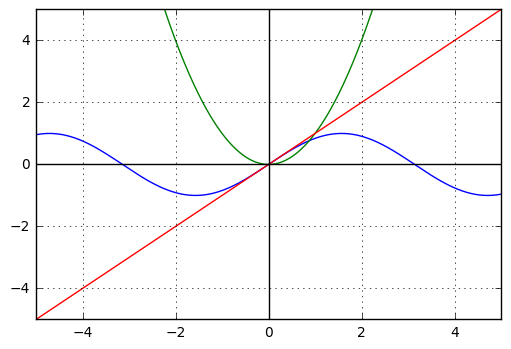

In [7]:
import math
import pylab as plt
import numpy as np

xlist = np.linspace(-10, 10, 999)
xlist_zeros = np.zeros(999)
ylist_sin = [math.sin(x) for x in xlist]
ylist_sq = [x**2 for x in xlist]
ylist_ln = [x for x in xlist]
ylist_mod = [abs(x) for x in xlist]
ylist_cos = [math.cos(x) for x in xlist]
ylist_coord = [x for x in xlist]

plt.plot (xlist, ylist_sin)
plt.plot (xlist, ylist_sq)
plt.plot (xlist, ylist_ln)
plt.grid(True)
plt.axhline(0, color='black')
plt.axvline(0, color='black')


plt.axis([-5, 5, -5, 5])

plt.show()

### 2. Подписи

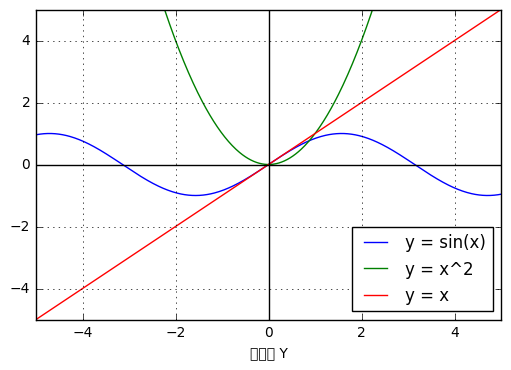

In [8]:
line_sin, line_sq, line_ln = plt.plot(xlist, ylist_sin, xlist, ylist_sq, xlist, ylist_ln)

plt.axis([-5, 5, -5, 5])
plt.grid(True)
plt.axhline(0, color='black')
plt.axvline(0, color='black')

plt.xlabel(u'Ось Х')
plt.xlabel(u'Ось Y')

plt.legend( (line_sin, line_sq, line_ln), ('y = sin(x)', 'y = x^2', 'y = x'), loc = 'best')

plt.show()

### 3. Два графика рядом

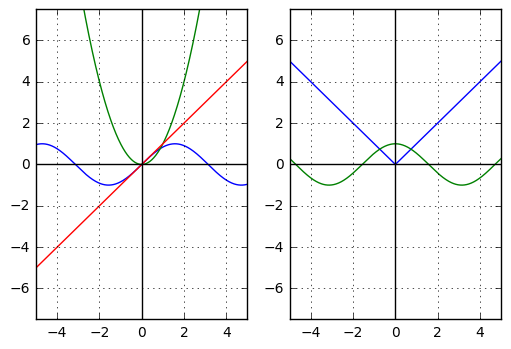

In [9]:
plt.subplot(1, 2, 1)
plt.plot (xlist, ylist_sin)
plt.plot (xlist, ylist_sq)
plt.plot (xlist, ylist_ln)
plt.axhline(0, color='black')
plt.axvline(0, color='black')

plt.axis([-5, 5, -7.5, 7.5])
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot (xlist, ylist_mod)
plt.plot (xlist, ylist_cos)

plt.axis([-5, 5, -7.5, 7.5])
plt.grid(True)
plt.axhline(0, color='black')
plt.axvline(0, color='black')

plt.show()

### 4. Сохранение

In [10]:
plt.savefig('graphs.png', format = 'png')

# SciPy

### 1. Генерация матрицы

In [11]:
from scipy import random

A = random.standard_normal((5,5))
print A

[[-0.61538118  0.0567018  -1.68812423  0.66045434 -0.68611313]
 [ 0.39546639 -2.01908664  1.20884197 -0.24095206 -0.31985626]
 [ 0.54296237  0.98789876 -1.10549321 -1.31367576  0.44636298]
 [ 0.75089369 -1.37699491 -1.07026738  1.26234056 -0.24605569]
 [-1.10900359 -1.4324509  -0.12251547 -0.16452657 -0.40873302]]


### 2. Нахождение собственных векторов и значений

In [12]:
from scipy import linalg

evals, evect = linalg.eig(A)


print evals, '\n'
print evect

[ 2.22167663+0.j          0.43673447+0.j         -1.36806358+0.95991557j
 -1.36806358-0.95991557j -2.80863741+0.j        ] 

[[ 0.41680176+0.j         -0.37608619+0.j         -0.56944214+0.j
  -0.56944214-0.j         -0.21137929+0.j        ]
 [-0.08387205+0.j         -0.23371862+0.j          0.21344427+0.29460653j
   0.21344427-0.29460653j  0.80580551+0.j        ]
 [-0.30873914+0.j         -0.09975218+0.j         -0.03354344+0.4324714j
  -0.03354344-0.4324714j  -0.30444389+0.j        ]
 [ 0.83411629+0.j          0.08721712+0.j          0.08357111+0.37139585j
   0.08357111-0.37139585j  0.25479413+0.j        ]
 [-0.16784497+0.j          0.88677926+0.j         -0.44407548+0.11447914j
  -0.44407548-0.11447914j  0.38521441+0.j        ]]


### 3. Проверка

In [14]:
import scipy as sp
D = evals[0]*evect[:,0]-sp.dot(A,evect[:,0])
print D

[ -5.55111512e-16+0.j   1.94289029e-16+0.j   4.44089210e-16+0.j
   0.00000000e+00+0.j   5.55111512e-17+0.j]
